In [19]:
!pip install tensorflow

In [20]:
import tensorflow as tf
import numpy as np

import math
import matplotlib.pyplot as plt

from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

In [21]:
# Import Fashion MNIST dataset
(train_set, train_labels), (test_set, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


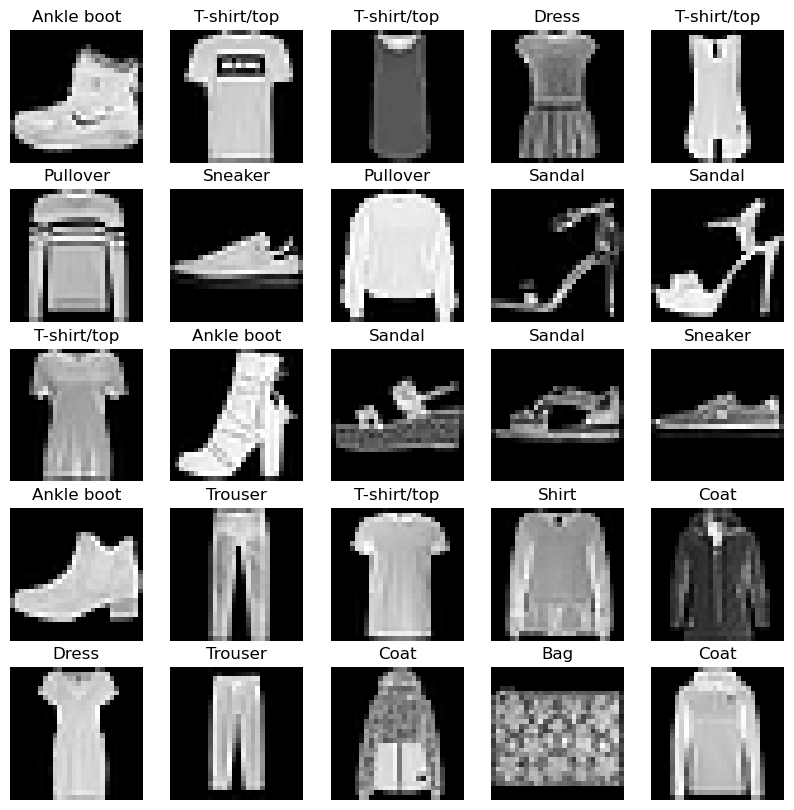

In [22]:
# Display a few sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_set[i], cmap='gray')  # Displaying images in grayscale
    plt.title(class_names[train_labels[i]])
    plt.axis('off')  # Turn off axis labels
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
# test_size
train_set, validation_set, train_labels, validation_labels = train_test_split(train_set, train_labels, test_size = 1/6, random_state=0)


In [24]:
# Normalise the values in the images to be between 0 and 1 (Normally the range is 0, 255)
train_set = train_set / 255.0
test_set = test_set / 255.0
validation_set = validation_set / 255.0


test_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in test_set]))
train_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in train_set]))
validation_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in validation_set]))

# test with small sample
#train_set  = train_set[:5000]
#train_labels = train_labels[:5000]
#test_set = test_set[:1000]
#test_labels = test_labels[:1000]
#validation_set = validation_set[:1000]
#validation_labels = validation_labels[:1000]

In [25]:
print(train_set.shape)
print(validation_set.shape)
print(test_set.shape)

(50000, 784)
(10000, 784)
(10000, 784)


In [26]:
len(train_set[0])

784

# **SVM Training**

# 1. Linear kernel

In [31]:
def train_and_evaluate(classifier, train_set, train_labels, validation_set, validation_labels):
    start_time = time.time()
    classifier.fit(train_set, train_labels)
    end_time = time.time()

    predicted_train = classifier.predict(train_set)
    predicted_validation = classifier.predict(validation_set)

    accuracy_train = accuracy_score(train_labels, predicted_train)
    accuracy_validation = accuracy_score(validation_labels, predicted_validation)

    training_time = end_time - start_time

    return accuracy_train, accuracy_validation, training_time

In [32]:
def run_models(C_values, train_set, train_labels, validation_set, validation_labels):
    svc_train_accuracies = []
    svc_val_accuracies = []
    svc_train_times = []
    linear_svc_train_accuracies = []
    linear_svc_val_accuracies = []
    linear_svc_train_times = []

    for C in C_values:
        print("\nTesting C =", C)

        svc = SVC(C=C, kernel='linear')
        linear_svc = LinearSVC(C=C)

        svc_accuracy_train, svc_accuracy_validation, svc_training_time = train_and_evaluate(
            svc, train_set, train_labels, validation_set, validation_labels)
        linear_svc_accuracy_train, linear_svc_accuracy_validation, linear_svc_training_time = train_and_evaluate(
            linear_svc, train_set, train_labels, validation_set, validation_labels)

        svc_train_accuracies.append(svc_accuracy_train)
        svc_val_accuracies.append(svc_accuracy_validation)
        svc_train_times.append(svc_training_time)

        linear_svc_train_accuracies.append(linear_svc_accuracy_train)
        linear_svc_val_accuracies.append(linear_svc_accuracy_validation)
        linear_svc_train_times.append(linear_svc_training_time)

        # print("SVC - Accuracy on train set:", svc_accuracy_train)
        print("SVC - Accuracy on validation set:", svc_accuracy_validation)
        print("SVC - Training time:", svc_training_time, "seconds")

        # print("LinearSVC - Accuracy on train set:", linear_svc_accuracy_train)
        print("LinearSVC - Accuracy on validation set:", linear_svc_accuracy_validation)
        print("LinearSVC - Training time:", linear_svc_training_time, "seconds")

    return svc_train_accuracies, svc_val_accuracies, svc_train_times, linear_svc_train_accuracies, linear_svc_val_accuracies, linear_svc_train_times

In [33]:
C_values = [1e-4, 1e-3, 1e-2, 1e-1, 1.00, 10.00, 100.00]

svc_train_acc, svc_val_acc, svc_train_time, linear_svc_train_acc, linear_svc_val_acc, linear_svc_train_time = run_models(
    C_values, train_set, train_labels, validation_set, validation_labels)


Testing C = 0.0001


C:\Users\nnhat\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVC - Accuracy on validation set: 0.7671
SVC - Training time: 611.832612991333 seconds
LinearSVC - Accuracy on validation set: 0.811
LinearSVC - Training time: 4.1716320514678955 seconds

Testing C = 0.001


C:\Users\nnhat\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVC - Accuracy on validation set: 0.834
SVC - Training time: 291.33587098121643 seconds
LinearSVC - Accuracy on validation set: 0.8457
LinearSVC - Training time: 4.404699325561523 seconds

Testing C = 0.01


C:\Users\nnhat\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVC - Accuracy on validation set: 0.865
SVC - Training time: 183.40004897117615 seconds
LinearSVC - Accuracy on validation set: 0.8548
LinearSVC - Training time: 13.205413103103638 seconds

Testing C = 0.1


C:\Users\nnhat\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\nnhat\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVC - Accuracy on validation set: 0.8679
SVC - Training time: 155.61584377288818 seconds
LinearSVC - Accuracy on validation set: 0.856
LinearSVC - Training time: 90.53393483161926 seconds

Testing C = 1.0


C:\Users\nnhat\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\nnhat\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVC - Accuracy on validation set: 0.8603
SVC - Training time: 195.36884450912476 seconds
LinearSVC - Accuracy on validation set: 0.8522
LinearSVC - Training time: 144.46867680549622 seconds

Testing C = 10.0


C:\Users\nnhat\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\nnhat\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVC - Accuracy on validation set: 0.8474
SVC - Training time: 472.7568690776825 seconds
LinearSVC - Accuracy on validation set: 0.8379
LinearSVC - Training time: 192.79570245742798 seconds

Testing C = 100.0


C:\Users\nnhat\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVC - Accuracy on validation set: 0.8417
SVC - Training time: 3441.5078756809235 seconds
LinearSVC - Accuracy on validation set: 0.8175
LinearSVC - Training time: 203.49650645256042 seconds


C:\Users\nnhat\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


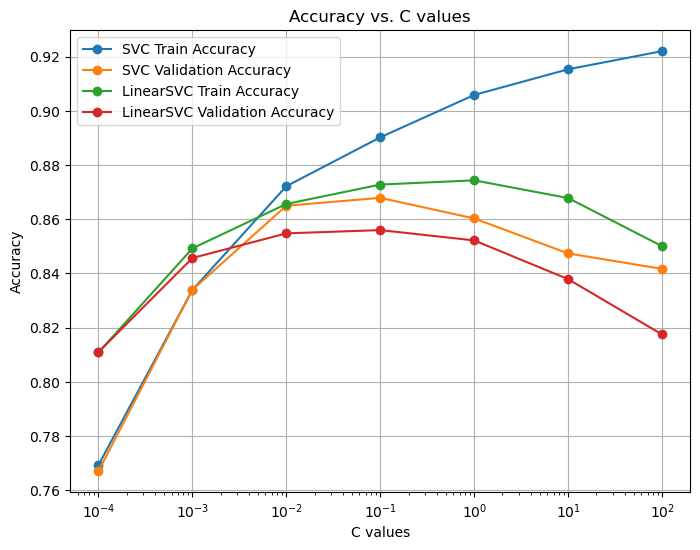

In [34]:
# Plotting the accuracies
plt.figure(figsize=(8, 6))
plt.title('Accuracy vs. C values')

plt.plot(C_values, svc_train_acc, marker='o', label='SVC Train Accuracy')
plt.plot(C_values, svc_val_acc, marker='o', label='SVC Validation Accuracy')
plt.plot(C_values, linear_svc_train_acc, marker='o', label='LinearSVC Train Accuracy')
plt.plot(C_values, linear_svc_val_acc, marker='o', label='LinearSVC Validation Accuracy')

plt.xscale('log')  # Use logarithmic scale
plt.xlabel('C values')
plt.ylabel('Accuracy')

plt.legend()
plt.grid(True)
plt.show()

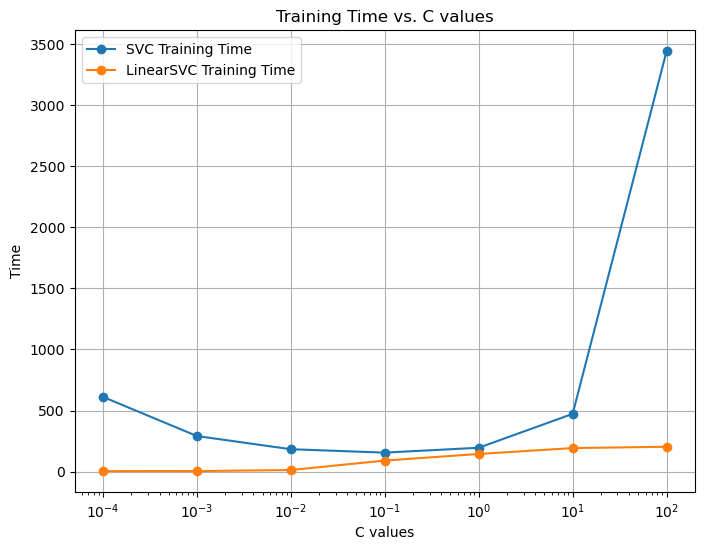

In [35]:
# Plotting the accuracies
plt.figure(figsize=(8, 6))
plt.title('Training Time vs. C values')

plt.plot(C_values, svc_train_time, marker='o', label='SVC Training Time')
plt.plot(C_values, linear_svc_train_time, marker='o', label='LinearSVC Training Time')

plt.xscale('log')  # Use logarithmic scale
plt.xlabel('C values')
plt.ylabel('Time')

plt.legend()
plt.grid(True)
plt.show()

In [36]:
best_svc_val_accuracy = max(svc_val_acc)
best_svc_C_index = svc_val_acc.index(best_svc_val_accuracy)
best_svc_C_value = C_values[best_svc_C_index]

best_linear_svc_val_accuracy = max(linear_svc_val_acc)
best_linear_svc_C_index = linear_svc_val_acc.index(best_linear_svc_val_accuracy)
best_linear_svc_C_value = C_values[best_linear_svc_C_index]

print("\nSVC:")
print("Best Validation Accuracy:", best_svc_val_accuracy)
print("Corresponding Best C value:", best_svc_C_value)
print("\nLinearSVC:")
print("Best Validation Accuracy:", best_linear_svc_val_accuracy)
print("Corresponding Best C value:", best_linear_svc_C_value)

if best_svc_val_accuracy >= best_linear_svc_val_accuracy:
    best_model = "SVC"
    best_val_accuracy = best_svc_val_accuracy
    best_C_value = best_svc_C_value
else:
    best_model = "LinearSVC"
    best_val_accuracy = best_linear_svc_val_accuracy
    best_C_value = best_linear_svc_C_value

print(f"\nConclude: Best Class: {best_model} (Best Validation Accuracy = {best_val_accuracy} at C = {best_C_value})")


SVC:
Best Validation Accuracy: 0.8679
Corresponding Best C value: 0.1

LinearSVC:
Best Validation Accuracy: 0.856
Corresponding Best C value: 0.1

Conclude: Best Class: SVC (Best Validation Accuracy = 0.8679 at C = 0.1)


# 2. Gaussian/RBF kernel

In [27]:
C_array = [0.01, 0.1, 1.00, 10.00, 100.00]
gamma_array = [0.01, 0.02, 0.03, 0.04, 0.05]
best_accuracy = - 1
best_gamma = 0
best_C = 0
best_classifier = None
accuracy_matrix = np.zeros((len(C_array), len(gamma_array)))
classifiers = []
rbf_svc_train_accuracies = []
rbf_svc_val_accuracies = []
rbf_svc_times = np.zeros((len(C_array), len(gamma_array)))

for i in range(0, len(C_array)):
      C = C_array[i]

      for j in range(0, len(gamma_array)):
        gamma = gamma_array[j]
        print("\nTesting C = ", C, "gamma = ", gamma)

        start_time = time.time()

        clf = SVC(C = C, gamma = gamma, kernel = 'rbf')
        clf.fit(train_set, train_labels)
        end_time = time.time()

        classifiers.append((C, gamma, clf))

        predicted_train = clf.predict(train_set)
        predicted_validation = clf.predict(validation_set)

        accuracy_train = accuracy_score(train_labels, predicted_train)
        accuracy_validation = accuracy_score(validation_labels, predicted_validation)
        rbf_svc_train_accuracies.append(accuracy_train)
        rbf_svc_val_accuracies.append(accuracy_validation)
        rbf_svc_times[i][j] = (end_time - start_time)

        accuracy_matrix[i, j] = accuracy_validation

        if accuracy_validation > best_accuracy:
            best_accuracy = accuracy_validation
            best_C = C
            best_gamma = gamma
            best_classifier = clf
        print("\naccuracy score with train_set: ", accuracy_train)
        print("\naccuracy score with validation_set: ", accuracy_validation)
        print("\ntime training: ", end_time - start_time)
        print("\n")



Testing C =  0.01 gamma =  0.01

accuracy score with train_set:  0.7802

accuracy score with validation_set:  0.779

time training:  746.2768030166626



Testing C =  0.01 gamma =  0.02

accuracy score with train_set:  0.79006

accuracy score with validation_set:  0.7891

time training:  938.7034120559692



Testing C =  0.01 gamma =  0.03

accuracy score with train_set:  0.78712

accuracy score with validation_set:  0.7883

time training:  1012.9219031333923



Testing C =  0.01 gamma =  0.04

accuracy score with train_set:  0.772

accuracy score with validation_set:  0.7699

time training:  1231.4561281204224



Testing C =  0.01 gamma =  0.05

accuracy score with train_set:  0.74172

accuracy score with validation_set:  0.7351

time training:  1456.9363102912903



Testing C =  0.1 gamma =  0.01

accuracy score with train_set:  0.85394

accuracy score with validation_set:  0.8546

time training:  303.2974109649658



Testing C =  0.1 gamma =  0.02

accuracy score with train_set:  0

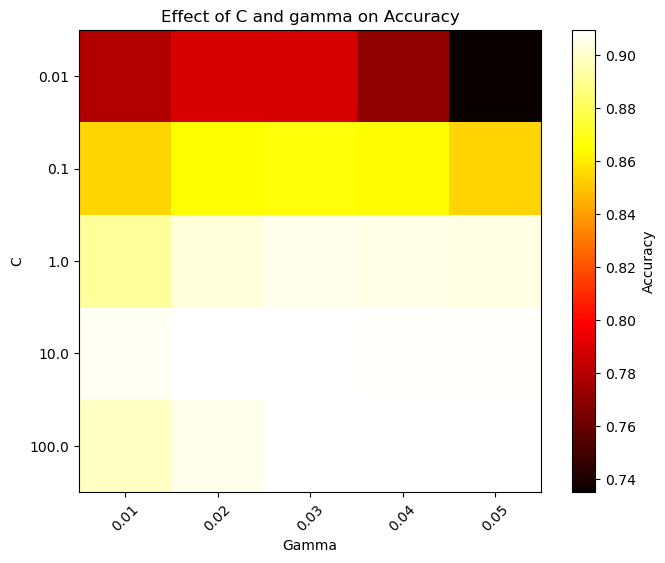

In [28]:
plt.figure(figsize=(8, 6))

plt.imshow(accuracy_matrix, cmap=plt.cm.hot, interpolation='nearest')
plt.colorbar(label='Accuracy')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.xticks(np.arange(len(gamma_array)), gamma_array, rotation=45)
plt.yticks(np.arange(len(C_array)), C_array)
plt.title('Effect of C and gamma on Accuracy')
plt.show()

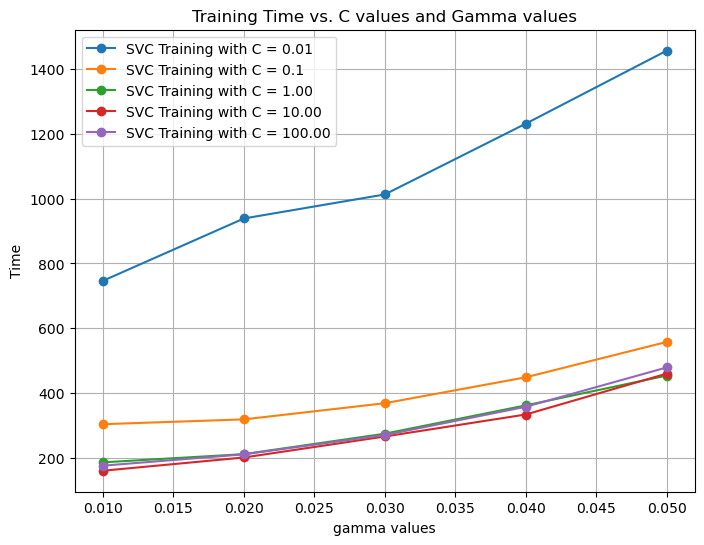

In [29]:
# Plotting the accuracies
#C_array = [0.01, 0.1, 1.00, 10.00, 100.00]
#gamma_array = [0.01, 0.02, 0.03, 0.04, 0.05]

plt.figure(figsize=(8, 6))
plt.title('Training Time vs. C values and Gamma values')

plt.plot(gamma_array, rbf_svc_times[0], marker='o', label='SVC Training with C = 0.01')
plt.plot(gamma_array, rbf_svc_times[1], marker='o', label='SVC Training with C = 0.1')
plt.plot(gamma_array, rbf_svc_times[2], marker='o', label='SVC Training with C = 1.00')
plt.plot(gamma_array, rbf_svc_times[3], marker='o', label='SVC Training with C = 10.00')
plt.plot(gamma_array, rbf_svc_times[4], marker='o', label='SVC Training with C = 100.00')

#plt.xscale('log')  # Use logarithmic scale
plt.xlabel('gamma values')
plt.ylabel('Time')

plt.legend()
plt.grid(True)
plt.show()

### Prediction on the best model based on the validation set:

In [30]:
print(f"best_accuracy: {best_accuracy}")
print(f"best C: {best_C}")
print(f"best gamma: {best_gamma}")


best_accuracy: 0.9094
best C: 100.0
best gamma: 0.03


In [37]:
predicted_test = best_classifier.predict(test_set)
accuracy_test = accuracy_score(test_labels, predicted_test)
print("\naccuracy score with train_set: ", accuracy_test)


accuracy score with train_set:  0.8988


# 3. Random Forest:

In [38]:
from sklearn.ensemble import RandomForestClassifier
def random_forest(X_train, y_train, X_test, y_test, n_estimators, max_features):
    
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, random_state=42)
    start_time = time.time()
    rf_model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_test_pred = rf_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)

    return accuracy, training_time

In [39]:
accuracy, training_time = random_forest(train_set, train_labels, test_set, test_labels, n_estimators=100, max_features='sqrt')
print(f"accuracy: {accuracy}")
print(f"training_time: {training_time}")


accuracy: 0.8739
training_time: 102.97511744499207
